In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/terrorism-in-world/terrorist-attacks new.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the Dataset

df = pd.read_csv('/kaggle/input/terrorism-in-world/terrorist-attacks new.csv')

In [4]:
# Printing the final 10 data

df.tail(10)

,Entity,Code,Year,Terrorist attacks
10507,Zimbabwe,ZWE,2012,0
10508,Zimbabwe,ZWE,2013,3
10509,Zimbabwe,ZWE,2014,1
10510,Zimbabwe,ZWE,2015,0
10511,Zimbabwe,ZWE,2016,0
10512,Zimbabwe,ZWE,2017,3
10513,Zimbabwe,ZWE,2018,2
10514,Zimbabwe,ZWE,2019,2
10515,Zimbabwe,ZWE,2020,1
10516,Zimbabwe,ZWE,2021,0


In [5]:
# Printing number of rows and columns

rows = df.shape[0] 
cols = df.shape[1] 
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))

Rows   : 10517
Columns: 4


In [6]:
# Dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10517 entries, 0 to 10516
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             10517 non-null  object
 1   Code               9263 non-null   object
 2   Year               10517 non-null  int64 
 3   Terrorist attacks  10517 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 328.8+ KB


In [7]:
# Checking for null data in the dataset

df.isnull().sum()

Entity                  0
Code                 1254
Year                    0
Terrorist attacks       0
dtype: int64

In [8]:
# Checking for the duplicate data in the dataset

print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


In [9]:
# Creating a dataframe for World's data

df_world = df[df['Entity'] == 'World']
df_world.head()

,Entity,Code,Year,Terrorist attacks
10178,World,OWID_WRL,1970,644
10179,World,OWID_WRL,1971,465
10180,World,OWID_WRL,1972,559
10181,World,OWID_WRL,1973,466
10182,World,OWID_WRL,1974,570


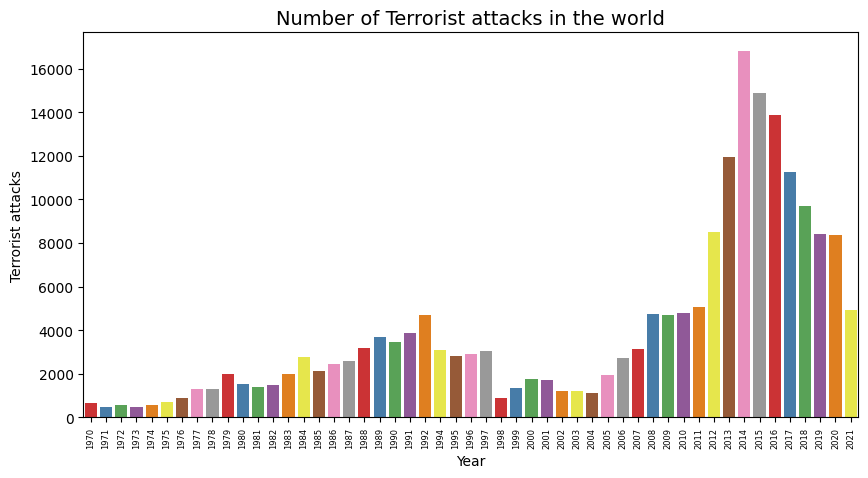

In [10]:
# Number of Terrorist attacks in the world bar graph

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_world, x = 'Year', y = 'Terrorist attacks', palette = 'Set1')
plt.title("Number of Terrorist attacks in the world", fontsize = 14)
plt.xticks(rotation=90, fontsize = 6)
plt.show()

In [11]:
# Creating a dataframe for each continent

options = ['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America', 'Central America & Caribbean']
  
# selecting rows based on the given condition

cont_df = df.loc[df['Entity'].isin(options)]
cont_df.head()

,Entity,Code,Year,Terrorist attacks
51,Africa,NaN,1970,4
52,Africa,NaN,1971,3
53,Africa,NaN,1972,2
54,Africa,NaN,1973,5
55,Africa,NaN,1974,7


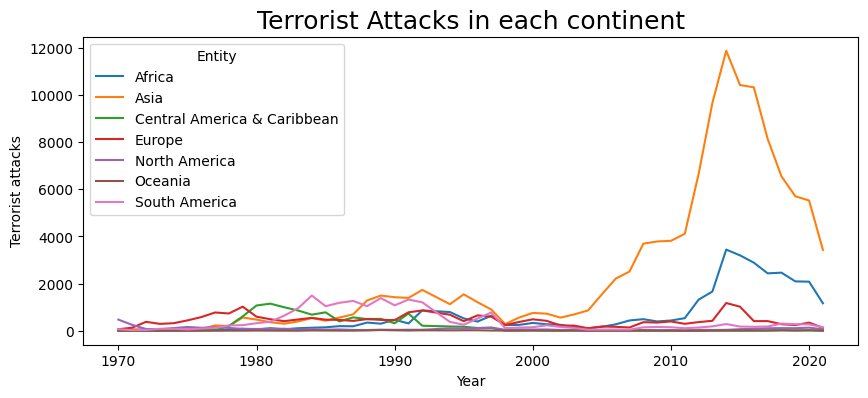

In [12]:
# Terrorist Attacks in each continent - Line Graph

fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=cont_df, x="Year", y="Terrorist attacks", hue="Entity")
plt.title("Terrorist Attacks in each continent", fontsize = 18)
plt.show()

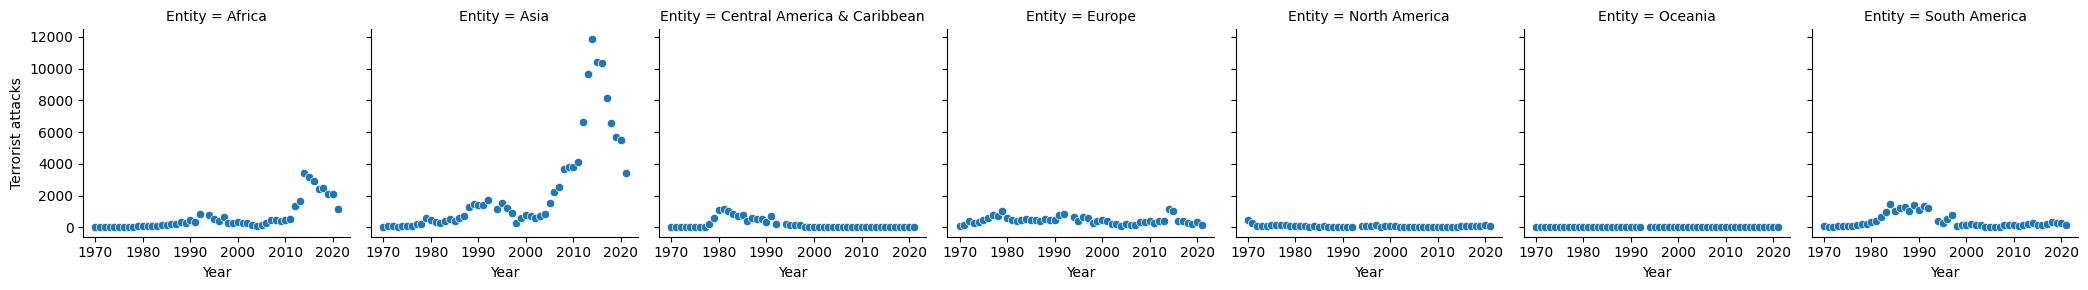

In [13]:
# Terrorist attack in each continent over the years - Face Grid

face_grid = sns.FacetGrid(cont_df, col="Entity")
face_grid.map(sns.scatterplot, "Year", "Terrorist attacks")
plt.show()

In [14]:
# Dataframe just for each Country's data

df_country = df.dropna()
df_country = df_country[(df_country['Entity']!='World')]
df_country

,Entity,Code,Year,Terrorist attacks
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,1
4,Afghanistan,AFG,1974,0
...,...,...,...,...
10512,Zimbabwe,ZWE,2017,3
10513,Zimbabwe,ZWE,2018,2
10514,Zimbabwe,ZWE,2019,2
10515,Zimbabwe,ZWE,2020,1


In [15]:
# Countries with most terrorist attacks

char_bar = df_country.groupby(['Entity'])[['Terrorist attacks']].sum().reset_index()
char_bar = char_bar.sort_values(by=("Terrorist attacks"), ascending=False)

top = char_bar.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=top['Entity'], y=top["Terrorist attacks"]))

fig.update_layout(title='Countries with most terrorist attacks',
                          xaxis_title='Entity',
                          yaxis_title= "Terrorist attacks",
                          plot_bgcolor='#00FFFF', 
                          paper_bgcolor='#00FFFF',  
                          font=dict(color='black'))

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

In [16]:
# Countries with least terrorist attacks

char_bar = df_country.groupby(['Entity'])[['Terrorist attacks']].sum().reset_index()
char_bar = char_bar.sort_values(by=("Terrorist attacks"), ascending=True)

top = char_bar.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=top['Entity'], y=top["Terrorist attacks"]))

fig.update_layout(title='Countries with least terrorist attacks',
                          xaxis_title='Entity',
                          yaxis_title= "Terrorist attacks",
                          plot_bgcolor='#00FFFF', 
                          paper_bgcolor='#00FFFF',  
                          font=dict(color='black'))

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

In [17]:
fig = px.choropleth(df_country,
                    locations='Entity', locationmode='country names',
                    color = 'Terrorist attacks',hover_name="Entity",
                    animation_frame="Year",
                    color_continuous_scale='Viridis_r')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0}, coloraxis_colorbar=dict(
    title = 'Terrorist attacks',
    ticks = 'outside',
    tickvals = [0,100,200,400,600,800,1000,1500,2000,3000],
    dtick = 12))              
fig.show()